In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt

In [2]:
csv_path = "../data/raw/diabetes_dataset.csv"

df = pd.read_csv(csv_path)
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [5]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nTarget distribution (Diabetes_binary):")
print(df["diagnosed_diabetes"].value_counts(normalize=True))

print("\nMissing values per column:")
print(df.isna().sum())

Shape: (100000, 31)

Columns: ['age', 'gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes']

Target distribution (Diabetes_binary):
diagnosed_diabetes
1    0.59998
0    0.40002
Name: proportion, dtype: float64

Missing values per column:
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status       

In [8]:
target_col = "diagnosed_diabetes"

X = df.drop(columns=[target_col])
y = df[target_col]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (100000, 30)
Target shape: (100000,)


In [10]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")

# Encode categorical variables if any exist
if len(categorical_columns) > 0:
    print("\nEncoding categorical variables...")
    for col in categorical_columns:
        X[col] = pd.Categorical(X[col]).codes

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # preserve class balance
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")
print(f"Class distribution in training set:\n{y_train.value_counts()}")
print(f"Class distribution in test set:\n{y_test.value_counts()}")

Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']
Numerical columns: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']

Encoding categorical variables...

Training set size: (80000, 30)
Test set size: (20000, 30)
Class distribution in training set:
diagnosed_diabetes
1    47998
0    32002
Name: count, dtype: int64
Class distribution in test set:
diagnosed_diabetes
1    12000
0     8000
Name: count, dtype: int64


In [12]:
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'   # helps with imbalance
)

log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

print("ROC AUC:", roc_auc_score(y_test, y_proba))

Confusion matrix:
[[ 7995     5]
 [   36 11964]]

Classification report:
              precision    recall  f1-score   support

           0      0.996     0.999     0.997      8000
           1      1.000     0.997     0.998     12000

    accuracy                          0.998     20000
   macro avg      0.998     0.998     0.998     20000
weighted avg      0.998     0.998     0.998     20000

ROC AUC: 0.9973238020833335


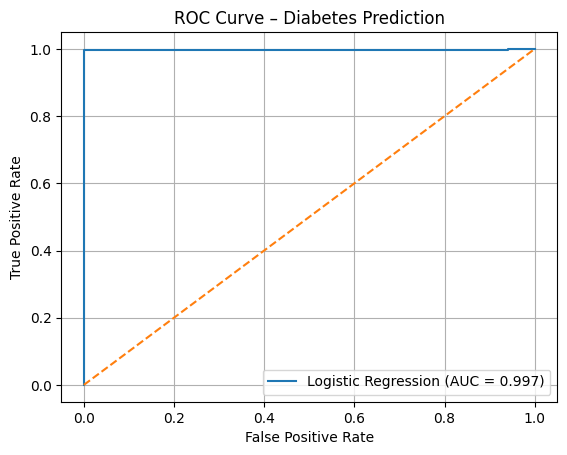

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Diabetes Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": log_reg.coef_[0]
}).sort_values("coef", ascending=False)

coef_df.head(10)

,feature,coef
29,diabetes_stage,5.907602
27,hba1c,1.743305
12,family_history_diabetes,0.163161
22,ldl_cholesterol,0.101105
25,glucose_postprandial,0.099062
16,waist_to_hip_ratio,0.083327
24,glucose_fasting,0.070448
23,triglycerides,0.061985
5,employment_status,0.037368
7,alcohol_consumption_per_week,0.031992
